In [2]:
from BigDFT import BioQM
sys=BioQM.load('6OPS-WT-opt-0-1.2.tar.bz2',serialization_version='1.2')

/opt/upstream/lib/python3.9/site-packages/Bio/SeqIO/PdbIO.py:322: BiopythonParserWarning: 'HEADER' line not found; can't determine PDB ID.
  warnings.warn(


In [3]:
sys2=BioQM.load('6OPT-2MUT-opt-0-1.2.tar.bz2',serialization_version='1.2')

/opt/upstream/lib/python3.9/site-packages/Bio/SeqIO/PdbIO.py:322: BiopythonParserWarning: 'HEADER' line not found; can't determine PDB ID.
  warnings.warn(


In [4]:
sys11=BioQM.load('6OPZ-11MUT-opt-0-1.2.tar.bz2',serialization_version='1.2')

/opt/upstream/lib/python3.9/site-packages/Bio/SeqIO/PdbIO.py:322: BiopythonParserWarning: 'HEADER' line not found; can't determine PDB ID.
  warnings.warn(


In [114]:
def data_plot(sys,tot_label='T',inttype='interactions'):
    from numpy import nan, isnan
    kind='total' if inttype=='interactions' else 'contact'
    chs='123456789'
    chinh = [sys.fragment_values('_'.join([ch,kind,inttype])) for ch in '123456789']
    for ch,dt in zip(chs,chinh):
        for frag in sys:
            idx = sys.fragment_names.index(frag)
            if 'C-' not in frag:
                if abs(dt[idx]) < 1:
                    dt[idx]=nan
            else:
                dt[idx]=0
    inh=[]
    for idx,frag in enumerate(sys.fragment_names):
        inh.append(sum(ch[idx] for ch in chinh if not isnan(ch[idx])))
    features={tot_label:sys.colordict(field_vals=inh)}
    data=[inh]
    #features.update({ch: '_'.join([ch,kind,'interactions']) for ch in chs})
    data+=chinh
    field_vals={ch: {'data': dt,
                     'kwargs':{'alpha':0.5,'marker':'o','kind':'scatter'}
                    }
                for ch,dt in zip(tot_label,data[0:1])}
    return features,field_vals

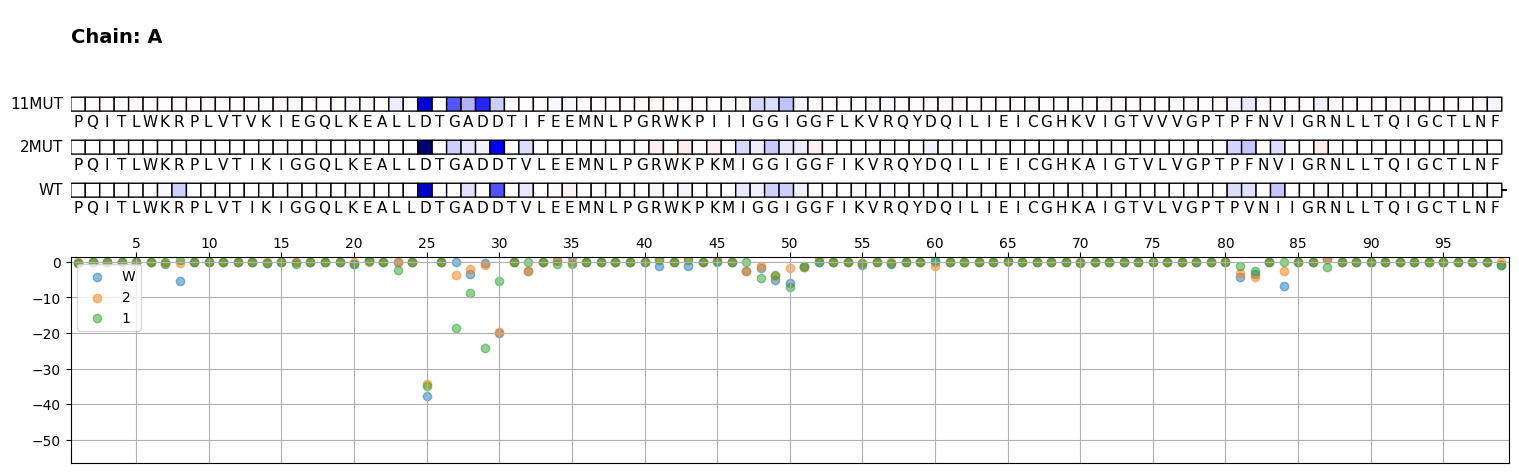

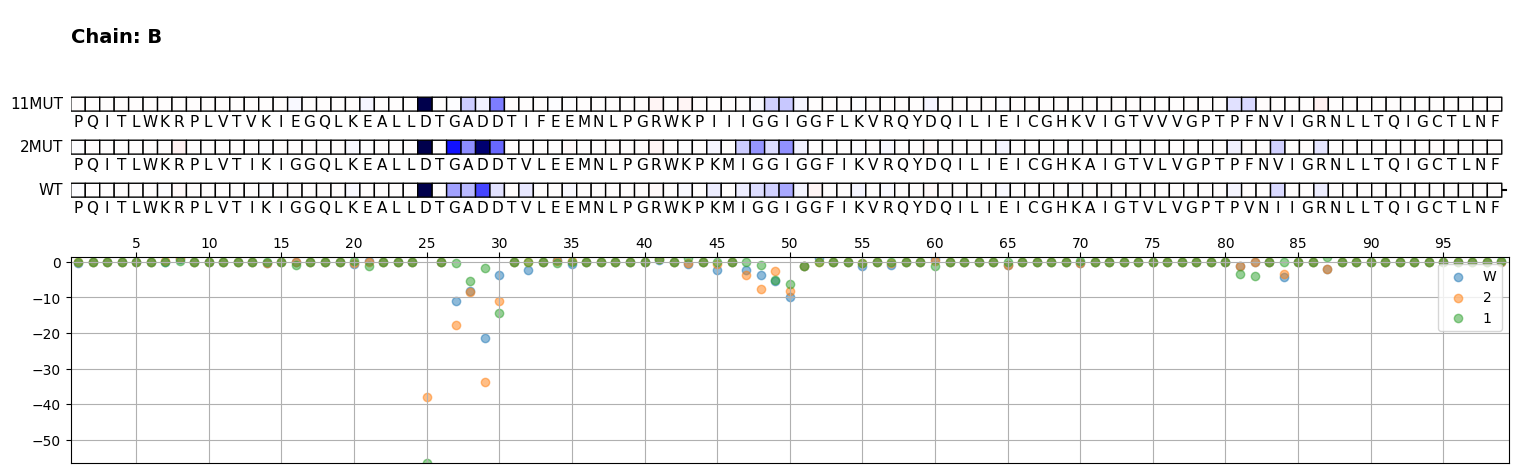

In [115]:
from BigDFT.Interop import DNAviewerInterop as D
features, field_vals=data_plot(sys,tot_label='WT')
features2, field_vals2=data_plot(sys2,tot_label='2MUT')
features11, field_vals11=data_plot(sys11,tot_label='11MUT')
_=D.display_records(D.sys_into_records(sys,features=features,field_vals=field_vals,line_length=100),
                   D.sys_into_records(sys2,features=features2,field_vals=field_vals2,line_length=100),
                   D.sys_into_records(sys11,features=features11,field_vals=field_vals11,line_length=100))

In [7]:
def graph_data(sys,kind='total'):
    from numpy import array, where
    features, field_vals=data_plot(sys)
    dt=field_vals['T']['data']
    for idx, frag in enumerate(sys.fragment_names):
        if 'C-' not in frag: continue
        num = str(BioQM.construct_frag_tuple(frag).id)
        tt = sys.fragment_values('_'.join([num, kind, 'interactions']))
        dt[idx] = sum(tt[i] for i, f in enumerate(sys.fragment_names) if 'C-' not in f)
    return dt

In [8]:
def inhibitor_mpro(sys):
    from numpy import array, where
    features, field_vals=data_plot(sys)
    st=0
    kind='total'
    for idx, frag in enumerate(sys.fragment_names):
        if 'C-' not in frag: continue
        num = str(BioQM.construct_frag_tuple(frag).id)
        tt = sys.fragment_values('_'.join([num, kind, 'interactions']))
        st += sum(tt[i] for i, f in enumerate(sys.fragment_names) if 'A-' in f or 'B-' in f)
    return st
def inhibitor_all(sys):
    from numpy import array, where
    features, field_vals=data_plot(sys)
    st=0
    kind='total'
    for idx, frag in enumerate(sys.fragment_names):
        if 'C-' not in frag: continue
        num = str(BioQM.construct_frag_tuple(frag).id)
        tt = sys.fragment_values('_'.join([num, kind, 'interactions']))
        st += sum(tt[i] for i, f in enumerate(sys.fragment_names) if 'C-' not in f)
    return st
def inhibitor_mpro_bo(sys):
    from numpy import array, where
    features, field_vals=data_plot(sys,inttype='bond_orders')
    st=0
    kind='contact'
    for idx, frag in enumerate(sys.fragment_names):
        if 'C-' not in frag: continue
        num = str(BioQM.construct_frag_tuple(frag).id)
        tt = sys.fragment_values('_'.join([num, kind, 'interactions']))
        st += sum(tt[i] for i, f in enumerate(sys.fragment_names) if 'A-' in f or 'B-' in f)
    return st
def inhibitor_all_bo(sys):
    from numpy import array, where
    features, field_vals=data_plot(sys,inttype='bond_orders')
    st=0
    kind='contact'
    for idx, frag in enumerate(sys.fragment_names):
        if 'C-' not in frag: continue
        num = str(BioQM.construct_frag_tuple(frag).id)
        tt = sys.fragment_values('_'.join([num, kind, 'interactions']))
        st += sum(tt[i] for i, f in enumerate(sys.fragment_names) if 'C-' not in f)
    return st

In [10]:
nt=BioQM.construct_frag_tuple('A-ILE:54')

In [12]:
nt.chain, nt.id, nt.

('A',
 54,
 <function FragmentTuple.index(value, start=0, stop=9223372036854775807, /)>)

In [17]:
df=sys.df
chs=[]
ress=[]
nums=[]
for f in df.frag:
    ch,res,num = BioQM.construct_frag_tuple(f)
    chs.append(ch)
    ress.append(res)
    nums.append(num)
df['chain']=chs
df['residue']=ress
df['id']=nums

In [50]:
l= lambda chain, res, id : '54' in id and 'W' not in chain

In [66]:
sys._fragment_quantities.keys()

dict_keys(['A_contact_regions', 'A_contact_bond_orders', 'A_contact_interactions', 'A_electrostatic_interactions', 'A_hartree_interactions', 'A_ionic_interactions', 'A_long_range_interactions', 'A_dispersion_interactions', 'A_total_interactions', 'A_substrate_distance', 'B_contact_regions', 'B_contact_bond_orders', 'B_contact_interactions', 'B_electrostatic_interactions', 'B_hartree_interactions', 'B_ionic_interactions', 'B_long_range_interactions', 'B_dispersion_interactions', 'B_total_interactions', 'B_substrate_distance', '1_contact_regions', '1_contact_bond_orders', '1_contact_interactions', '1_electrostatic_interactions', '1_hartree_interactions', '1_ionic_interactions', '1_long_range_interactions', '1_dispersion_interactions', '1_total_interactions', '1_substrate_distance', '2_contact_regions', '2_contact_bond_orders', '2_contact_interactions', '2_electrostatic_interactions', '2_hartree_interactions', '2_ionic_interactions', '2_long_range_interactions', '2_dispersion_interactions

4


<Axes: >

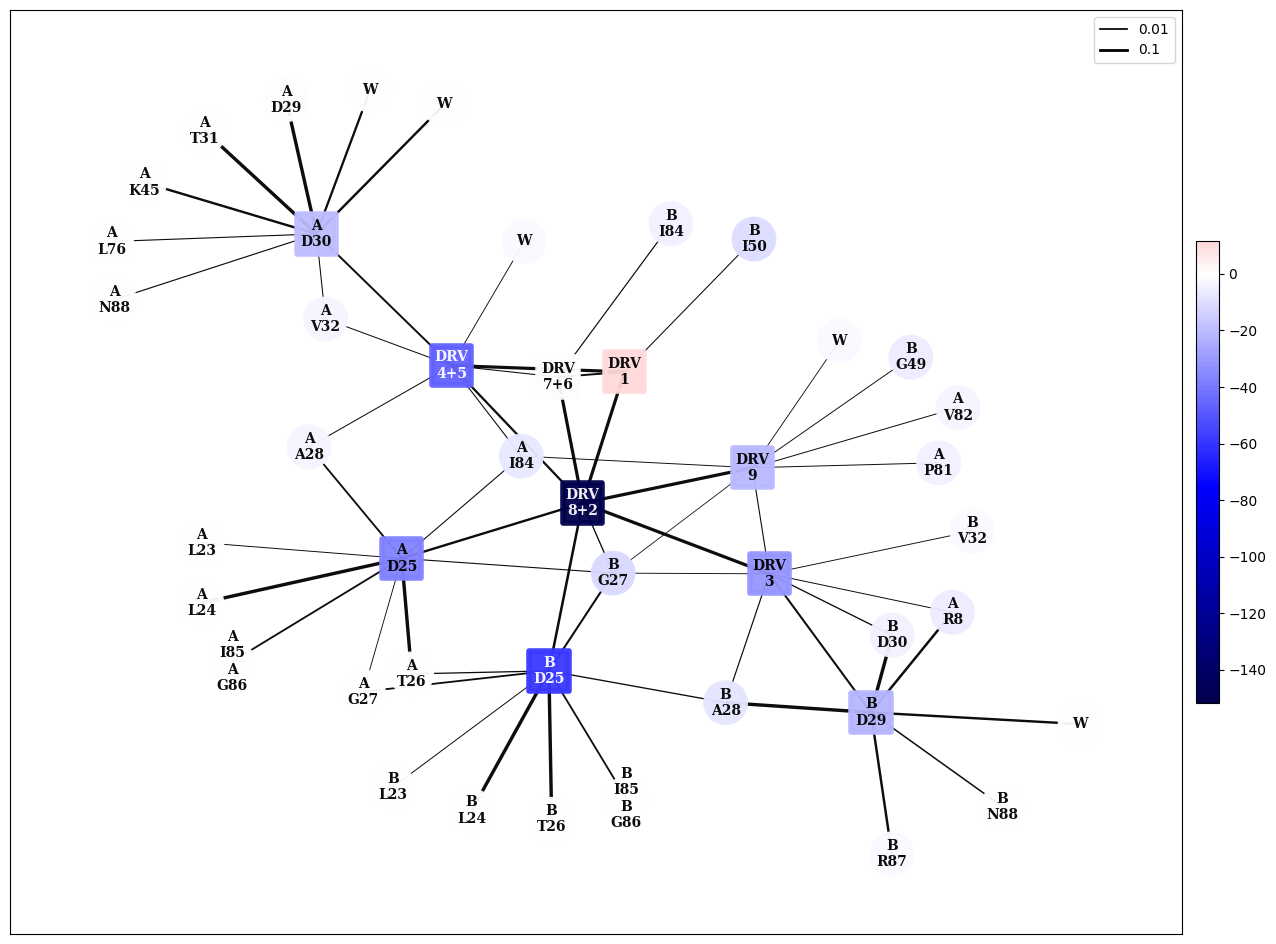

In [103]:
def network(sys):
    from numpy import array, where
    view=sys.refragment(0.075)
    dt = graph_data(sys)
    #relevant = list(array(sys.fragment_names)[where(abs(array(dt)) > 1)]) 
    relevant, _=sys.identify_contact_region(target=[f for f in sys if 'C-' in f],cutoff_bo=0.015,cutoff_el=1)
    relevant = [r for r in relevant if 'C-' not in r]
    for f in list(relevant):
        if f not in view:
            relevant.remove(f)
            for v in view:
                if f in v:
                    relevant.append(v)
                    break
    print (len(relevant))
    extra_targets=['A-ILE:54', 'B-ILE:54']
    if not all(f in sys for f in extra_targets):
        extra_targets=['A-LEU:54', 'B-LEU:54']
    return sys.display_graph(restrict_to=[f for f in view if 'C-' in f]+relevant,field_vals=dt,view=view,
                             fragment_labels={f:('W' 
                                          if 'WAT' in f else 'DRV\n'+(str(BioQM.construct_frag_tuple(f).id) 
                                                                        if '+' not in f else '+'.join([ n[-1] for n in f.split('+')])))
                                          for f in view if 'A-' not in f and 'B-' not in f},
                             bo_cutoff=0.005)
network(sys)

4


<Axes: >

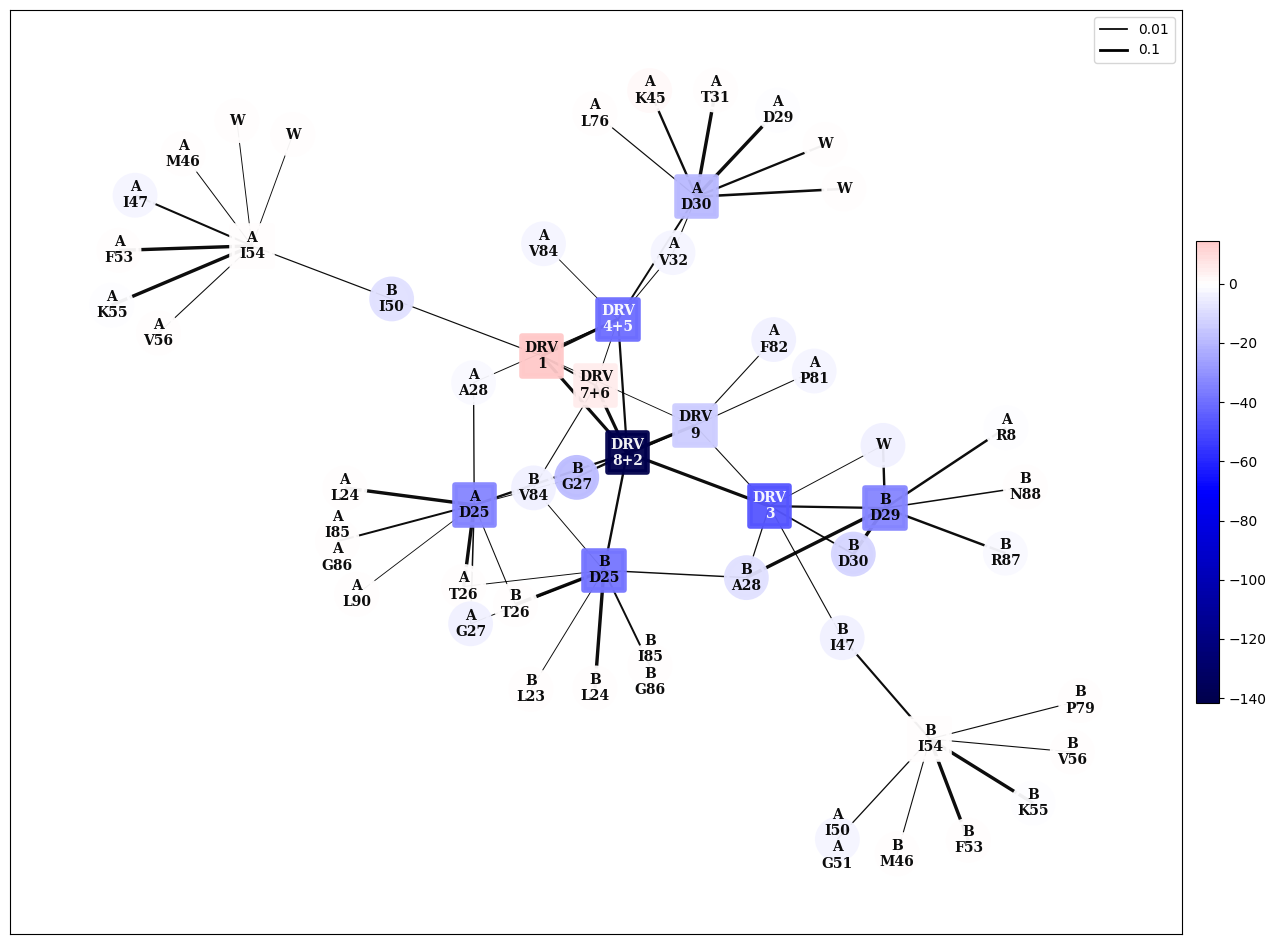

In [99]:
network(sys2) 

4


<Axes: >

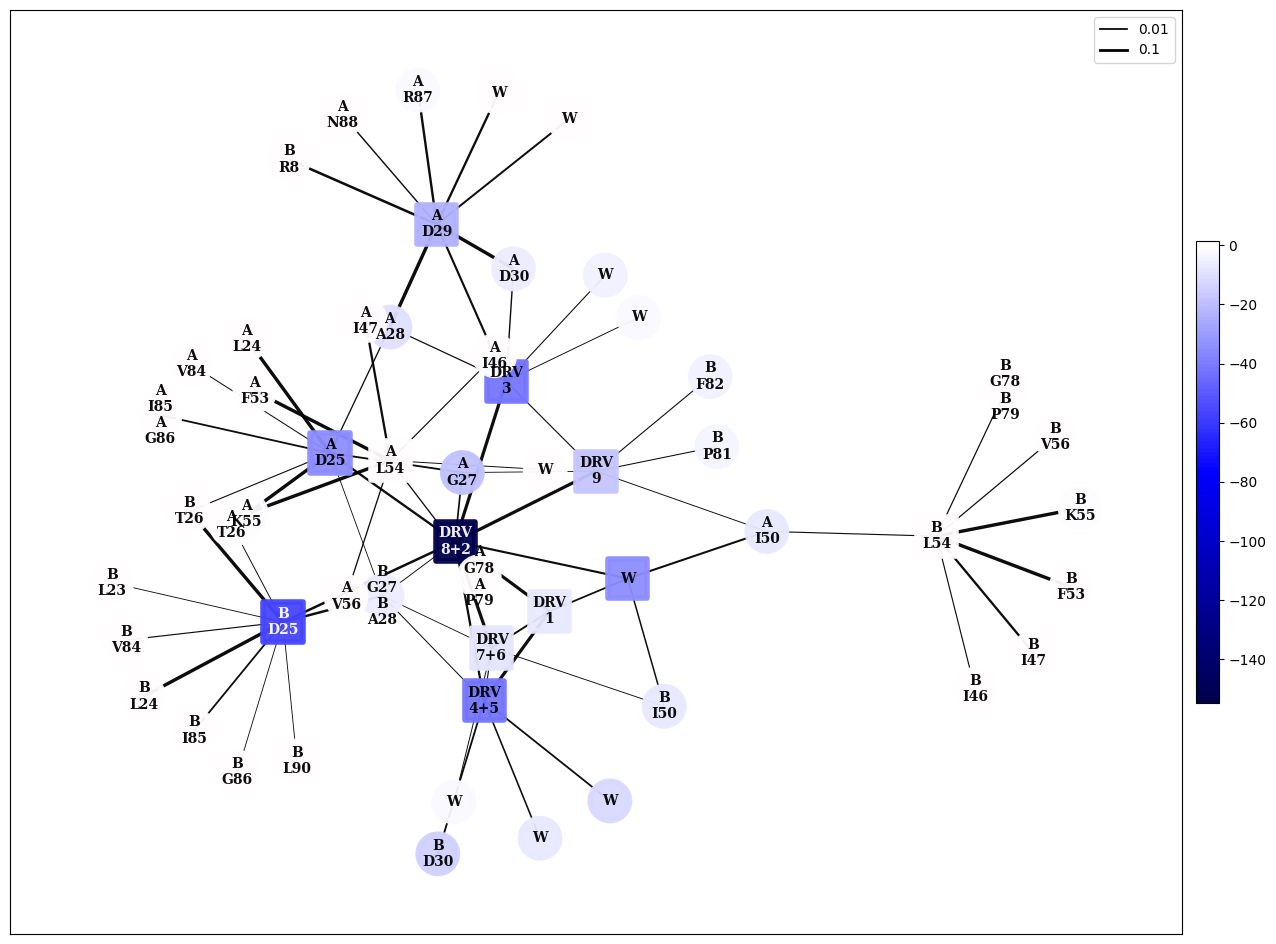

In [100]:
network(sys11)

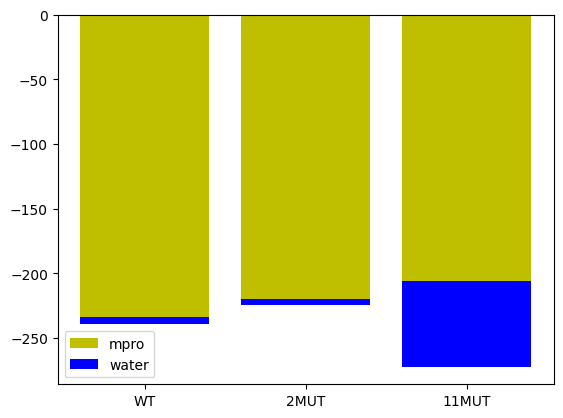

In [42]:
from matplotlib import pyplot as plt
from numpy import array
mpro=array([inhibitor_mpro(s) for s in [sys,sys2,sys11]])
tot=array([inhibitor_all(s) for s in [sys,sys2,sys11]])
names=['WT','2MUT','11MUT']
plt.bar(names,mpro,label='mpro',color='y')
plt.bar(names,tot-mpro,bottom=mpro,label='water',color='b')
plt.legend()

In [49]:
def get_enz(sys):
    return sys.subsystem(sys.sequences_to_fragments[0]+sys.sequences_to_fragments[1])

In [50]:
enz=get_enz(sys)
enz2=get_enz(sys2)
enz11=get_enz(sys11)

In [52]:
from BigDFT import Fragments as F
e0=F.Fragment(system=enz)
e2=F.Fragment(system=enz2)

In [54]:
e2.rmsd(reference=e2)

1.1892125757739642e-14

<BarContainer object of 3 artists>

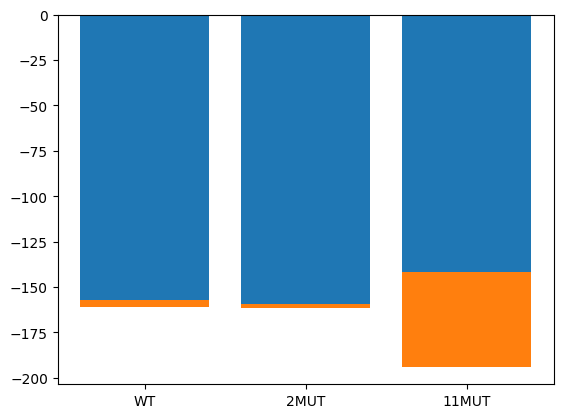

In [27]:
mpro_bo=array([inhibitor_mpro_bo(s) for s in [sys,sys2,sys11]])
tot_bo=array([inhibitor_all_bo(s) for s in [sys,sys2,sys11]])
names=['WT','2MUT','11MUT']
plt.bar(names,mpro_bo)
plt.bar(names,tot_bo-mpro_bo,bottom=mpro_bo)

In [43]:
from BigDFT.PostProcessing import dict_distplot

In [45]:
def purities_plot(sys):
    purities={}
    for frag,purity in sys.purities.items():
        tpl=BioQM.construct_frag_tuple(frag)
        purities.setdefault(tpl.residue,[]).append(abs(purity))
    ax=dict_distplot(purities,kind='box')
    ax[0].axhline(0.05)
    ax[0].axhline(0.075)

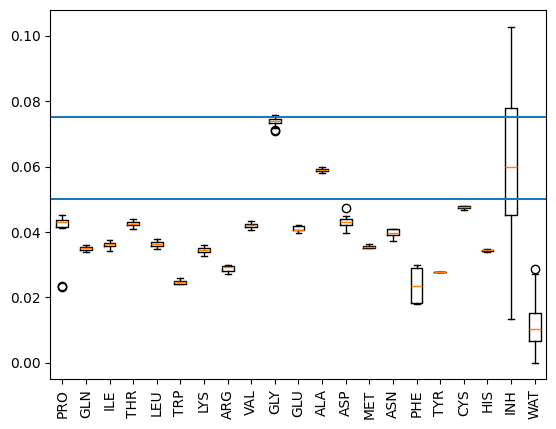

In [46]:
purities_plot(sys)

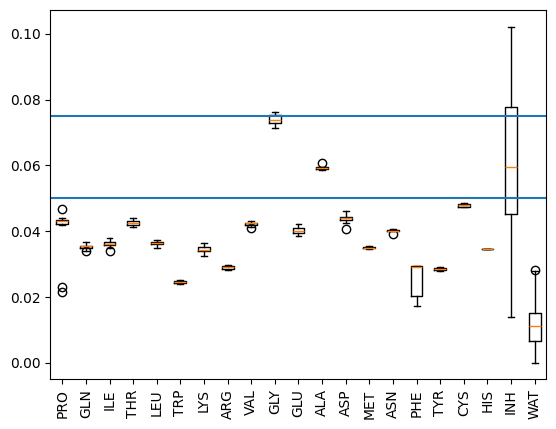

In [47]:
purities_plot(sys2)

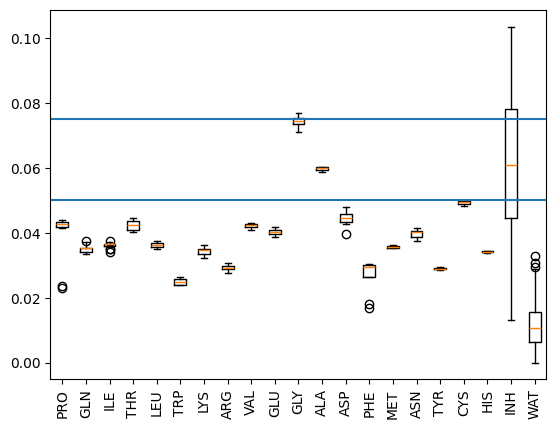

In [48]:
purities_plot(sys11)